<a href="https://colab.research.google.com/github/Inddeed/Ecommerce-Cancellation-Rate-Analysis/blob/main/Raihan_Ecommerce_Cancellation_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Goal**

**To find factors impacting the increased rate of cancelled order and summarize the findings**

# **Understanding the Data**

The dataset contains detailed information of half a million e-commerce orders in Pakistan from March 2016 to August 2018. It contains item details, shipping method, payment method like credit card, Easy-Paisa, Jazz-Cash, cash-on-delivery, product categories like fashion, mobile, electronics, appliance etc., date of order, SKU, price, quantity, total and customer ID. This is the most detailed dataset about e-commerce in Pakistan that you can find in the Public domain.

https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset

# **Importing Libraries & Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing our main dataset
potter_url = 'https://drive.google.com/file/d/1ACB0NHXIK48bEV8wgsQ_aLCSbQYWqAD6/view?usp=sharing'
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]
df = pd.read_csv(potter)

In [ ]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016,7,2016-7,Jul-16,FY17,1.0
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016,7,2016-7,Jul-16,FY17,2.0
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,Jul-16,FY17,3.0
3,211135,complete,7/1/2016,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016,7,2016-7,Jul-16,FY17,4.0
4,211136,order_refunded,7/1/2016,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016,7,2016-7,Jul-16,FY17,5.0


# **Data Cleaning**

## **Converting Datatypes**

Before continuing it is important to convert our datatype to ensure all of our feature can be analyze as it meant to be

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

Lets convert:\
**qty_ordered** to int\
**created at** to datetime\
**working date** to datetime\
**MV** to float\
**Customer Since** to datetime\
**Customer ID** to string

In [ ]:
df.head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016,7,2016-7,Jul-16,FY17,1.0
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016,7,2016-7,Jul-16,FY17,2.0
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,Jul-16,FY17,3.0


In [ ]:
df['qty_ordered'] = df['qty_ordered'].astype(int)
df[' MV '] = df[' MV '].str.replace(',', '', regex=False) #Removing ","
df[' MV '] = df[' MV '].str.replace(' -   ', '0', regex=False) #Replacing "-" to 0
df[' MV '] = df[' MV '].astype(int)
df['created_at'] = pd.to_datetime(df['created_at'], format='%m/%d/%Y')
df['Working Date'] = pd.to_datetime(df['Working Date'], format='%m/%d/%Y')
df['Customer Since'] = pd.to_datetime(df['Customer Since'], format='%Y-%m')
df['Customer ID'] = df['Customer ID'].astype(str)

## **Treat Typos**

In [ ]:
pd.reset_option('all')

for i in df.select_dtypes(exclude = 'number'):
  print(df[i].value_counts())
  print('-----------------------------------------------')

status
complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: count, dtype: int64
-----------------------------------------------
created_at
2016-11-25    15169
2017-11-17    13698
2017-11-24    13191
2017-05-19    11511
2016-11-23     8478
              ...  
2018-08-22       92
2016-09-14       83
2016-07-06       72
2016-09-13       52
2016-07-07       51
Name: count, Length: 789, dtype: int64
-----------------------------------------------
sku
MATSAM59DB75ADB2F80              3775
Al Muhafiz Sohan Halwa Almond    2258
emart_00-7                       2027
kcc_krone deal                   1894
infinix_Zero 4-Grey              1793
       

We find that there is an out of place value on BI Status with #REF value, lets remove them

In [ ]:
df = df[df['BI Status'] != '#REF!']

In [ ]:
df['BI Status'].value_counts()

,count
BI Status,
Net,234178
Gross,201454
Valid,148891


## **Treat Duplicates**

In [ ]:
df.duplicated().sum()

0

There are no duplicate value accross all feature

## **Removing Redundant Features**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584523 entries, 1 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584523 non-null  int64         
 1   status                 584508 non-null  object        
 2   created_at             584523 non-null  datetime64[ns]
 3   sku                    584503 non-null  object        
 4   price                  584523 non-null  float64       
 5   qty_ordered            584523 non-null  int64         
 6   grand_total            584523 non-null  float64       
 7   increment_id           584523 non-null  object        
 8   category_name_1        584359 non-null  object        
 9   sales_commission_code  447345 non-null  object        
 10  discount_amount        584523 non-null  float64       
 11  payment_method         584523 non-null  object        
 12  Working Date           584523 non-null  datetime6

Lets remove features unneeded for analysis as they may not provide meaningful insights for analysis or already represented by other features, such feature include:
* item_id: This feature may not give enough insights for analysis
* Customer_ID: This feature may not give enough insights for analysis
* increment_id:  This feature may not give enough insights for analysis
* sales_commission_code: since there are a significant amount of values missing, we cant predict what those missing values are so we may remove the entire column
* created_at: Can be represented by M-Y feature
* Customer Since: Can be represented by M-Y feature
* Working Date: Can be represented by M-Y feature
* FY: Can be represented by M-Y feature



In [ ]:
df = df.drop(['item_id', 'sales_commission_code', 'created_at', 'Customer Since', 'Working Date', 'FY'], axis=1)

In [ ]:
df.head()

,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,BI Status,MV,Year,Month,M-Y,Customer ID
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,Gross,240,2016,7,Jul-16,2.0
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,Gross,2450,2016,7,Jul-16,3.0
3,complete,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,Net,360,2016,7,Jul-16,4.0
4,order_refunded,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,Valid,1110,2016,7,Jul-16,5.0
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,100147448,Soghaat,0.0,cod,Gross,80,2016,7,Jul-16,6.0


Lets check for missing value

## **Removing NaN or Missing Values**

In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
category_name_1,164
sku,20
status,15
price,0
qty_ordered,0
grand_total,0
increment_id,0
discount_amount,0
payment_method,0
BI Status,0


Lets remove null value on category name and status Since as the number of missing value is miniscule compared to the whole dataset

In [ ]:
df = df[~df['status'].isnull()]
df = df[~df['category_name_1'].isnull()]
df = df[~df['sku'].isnull()]
df = df[~df['Customer ID'].isnull()]

In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
status,0
sku,0
price,0
qty_ordered,0
grand_total,0
increment_id,0
category_name_1,0
discount_amount,0
payment_method,0
BI Status,0


In [ ]:
df[df['Customer ID'] == 'nan']['Customer ID'].value_counts()

,count
Customer ID,
nan,11


Lets remove nan value aswel from customer ID

In [ ]:
df = df[df['Customer ID'] != 'nan']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584313 entries, 1 to 584523
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           584313 non-null  object 
 1   sku              584313 non-null  object 
 2   price            584313 non-null  float64
 3   qty_ordered      584313 non-null  int64  
 4   grand_total      584313 non-null  float64
 5   increment_id     584313 non-null  object 
 6   category_name_1  584313 non-null  object 
 7   discount_amount  584313 non-null  float64
 8   payment_method   584313 non-null  object 
 9   BI Status        584313 non-null  object 
 10   MV              584313 non-null  int64  
 11  Year             584313 non-null  int64  
 12  Month            584313 non-null  int64  
 13  M-Y              584313 non-null  object 
 14  Customer ID      584313 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 71.3+ MB


In [ ]:
check = ['status', 'category_name_1', 'payment_method']
for i in check:
  print(df[i].value_counts())
  print('------------------------------')

status
complete          233683
canceled          201127
received           77284
order_refunded     59498
refund              8020
cod                 2854
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: count, dtype: int64
------------------------------
category_name_1
Mobiles & Tablets     115709
Men's Fashion          92218
Women's Fashion        59719
Appliances             52413
Superstore             43611
Beauty & Grooming      41493
Soghaat                34011
Others                 29208
Home & Living          26504
Entertainment          26322
Health & Sports        17502
Kids & Baby            16489
Computing              15933
\N                      7833
School & Education      3478
Books                   1870
Name: count, dtype: int64
------------------------------

There are several /N value in status column and category name column lets remove them

In [ ]:
df = df[df['status'] != r'\N']
df = df[df['category_name_1'] != r'\N']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576480 entries, 1 to 584523
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           576480 non-null  object 
 1   sku              576480 non-null  object 
 2   price            576480 non-null  float64
 3   qty_ordered      576480 non-null  int64  
 4   grand_total      576480 non-null  float64
 5   increment_id     576480 non-null  object 
 6   category_name_1  576480 non-null  object 
 7   discount_amount  576480 non-null  float64
 8   payment_method   576480 non-null  object 
 9   BI Status        576480 non-null  object 
 10   MV              576480 non-null  int64  
 11  Year             576480 non-null  int64  
 12  Month            576480 non-null  int64  
 13  M-Y              576480 non-null  object 
 14  Customer ID      576480 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 70.4+ MB


## **Add Canceled Flag Column**

Since we are interested in canceled status, we can make a new feature that flags order status canceled as 1 and other statuses as 0. Then we can remove status column

In [ ]:
def as_cancel(value):
  if value == 'canceled':
    return '1'
  else:
    return '0'

In [ ]:
df['is_canceled'] = df['status'].apply(as_cancel)

## **Add Discount Occurence Flag**

In [ ]:
df['is_discounted'] = df['discount_amount'].apply(lambda x: '1' if x > 0 else '0')

## **Check for Transaction Grand Total Validity**

In [ ]:
df['grand_total2'] = (df['price'] * df['qty_ordered']) - df['discount_amount']

In [ ]:
df['diff'] = df['grand_total2'] - df['grand_total']

In [ ]:
df['diff'].describe()

,diff
count,5.764800e+05
mean,-1.872145e+03
std,3.086616e+04
min,-8.944000e+06
25%,-9.990000e+02
50%,-1.500000e+02
75%,0.000000e+00
max,2.079980e+05


There are difference between manual price * quantity and the given grand total data. From the statistics above, it is indicative that there are miss calculation of the original grand total column where it supposed to calculate the transaction amount of each order. We may replace this grand total column with appropriate calculation. We'll use (price * quantity) - discount for the calculation

In [ ]:
df['grand_total'] = (df['price'] * df['qty_ordered']) - df['discount_amount']

In [ ]:
df = df.drop(['grand_total2', 'diff'], axis=1)

Let's check for further inappropriate values

## **Check for Price and Order Quantity Validity**

In [ ]:
df[df['price'] == 0]['price'].value_counts()

,count
price,
0.0,2203


There are around 2,231 order that has 0 value. For analysis purposes we can remove these value as it may not plausible for a product price to be 0

In [ ]:
df = df[df['price'] != 0]

In [ ]:
df[df['qty_ordered'] == 0]['qty_ordered'].value_counts()

,count
qty_ordered,


There are no more order that has 0 value for quantity ordered :D

## **Classify Payment Method**

In [ ]:
df['payment_method'].value_counts().sort_values(ascending = False)

,count
payment_method,
cod,265809
Payaxis,96204
Easypay,82619
jazzwallet,34299
easypay_voucher,31045
bankalfalah,23011
jazzvoucher,15081
Easypay_MA,13921
customercredit,7500


Easypays payment method can be grouped in to one categories of payment method

In [ ]:
df['payment_method'] = df['payment_method'].replace({
    'Easypay_MA': 'Easypay',
    'easypayvoucher': 'Easypay',
    'easypay_voucher': 'Easypay',
    'Easypay': 'Easypay',
    'jazzvoucher':'jazzwallet'
})

## **Checking Further for Redundant Features**

In [ ]:
df['diff'] = (df['price'] * df['qty_ordered']) - df[' MV ']

In [ ]:
df['diff'].describe()

,diff
count,574277.000000
mean,-0.002126
std,0.046873
min,-0.500000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.490000


It is found that the column MV has the same value as price * quantity. This column may not give further insights for our analysis as we have the grand total column that represent the transaction amount fr each order. Lets remove the column MV, lets remove it.

In [ ]:
df = df.drop([' MV ','diff'], axis = 1)

The Month and Year feaure may come in as not very useful, lets merge them into M-Y as one

In [ ]:
df['M-Y'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

In [ ]:
df['M-Y'] = pd.to_datetime(df['M-Y'], format='%Y-%m')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574277 entries, 1 to 584523
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   status           574277 non-null  object        
 1   sku              574277 non-null  object        
 2   price            574277 non-null  float64       
 3   qty_ordered      574277 non-null  int64         
 4   grand_total      574277 non-null  float64       
 5   increment_id     574277 non-null  object        
 6   category_name_1  574277 non-null  object        
 7   discount_amount  574277 non-null  float64       
 8   payment_method   574277 non-null  object        
 9   BI Status        574277 non-null  object        
 10  Year             574277 non-null  int64         
 11  Month            574277 non-null  int64         
 12  M-Y              574277 non-null  datetime64[ns]
 13  Customer ID      574277 non-null  object        
 14  is_canceled      574277 n

In [ ]:
df['Customer ID'].value_counts()

,count
Customer ID,
85775.0,2524
163.0,2332
35.0,1867
33.0,1360
31025.0,1344
...,...
52782.0,1
52786.0,1
52792.0,1


Lets remove the decimal from the string of customer ID

In [ ]:
df['Customer ID'] = df['Customer ID'].str.replace(r'\.0$', '', regex=True)

## **Changing Features Name**

Lets change ambiguous and inefficient column name in the dataset

In [ ]:
df = df.rename(columns={"category_name_1": "category_name", "BI Status": "bi_status", 'M-Y':'transaction_date', 'Month':'month', 'Year':'year', 'Customer ID':'customer_id'})

In [ ]:
df.head()

,status,sku,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,bi_status,year,month,transaction_date,customer_id,is_canceled,is_discounted
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,Gross,2016,7,2016-07-01,2,1,0
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,Gross,2016,7,2016-07-01,3,1,0
3,complete,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,Net,2016,7,2016-07-01,4,0,1
4,order_refunded,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,Valid,2016,7,2016-07-01,5,0,0
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,100147448,Soghaat,0.0,cod,Gross,2016,7,2016-07-01,6,1,0


All Done! lets move on to EDA!

# **Exploratory Data Analysis**

## **General EDA**

Lets start with general EDA to know our data distribution better

In [ ]:
df.describe()

,price,qty_ordered,grand_total,discount_amount,year,month,transaction_date
count,5.742770e+05,574277.000000,5.742770e+05,574277.000000,574277.000000,574277.000000,574277
mean,6.405061e+03,1.292472,6.740362e+03,505.196979,2017.053290,7.151631,2017-07-25 18:55:00.460230656
min,1.000000e-01,1.000000,-1.541000e+04,-599.500000,2016.000000,1.000000,2016-07-01 00:00:00
25%,3.700000e+02,1.000000,3.584000e+02,0.000000,2017.000000,4.000000,2017-02-01 00:00:00
50%,9.200000e+02,1.000000,9.500000e+02,0.000000,2017.000000,7.000000,2017-08-01 00:00:00
75%,4.164000e+03,1.000000,4.520000e+03,167.000000,2018.000000,11.000000,2018-02-01 00:00:00
max,1.012626e+06,1000.000000,8.944000e+06,90300.000000,2018.000000,12.000000,2018-08-01 00:00:00
std,1.503047e+04,3.982050,3.392688e+04,1513.250179,0.704403,3.488561,NaN


In [ ]:
df.describe(include=['O'])

,status,sku,increment_id,category_name,payment_method,bi_status,customer_id,is_canceled,is_discounted
count,574277,574277,574277,574277,574277,574277,574277,574277,574277
unique,15,84236,401009,15,15,3,113967,2,2
top,complete,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,cod,Net,85775,0,0
freq,230088,3775,72,115396,265809,230580,2524,377041,368256


<Axes: >

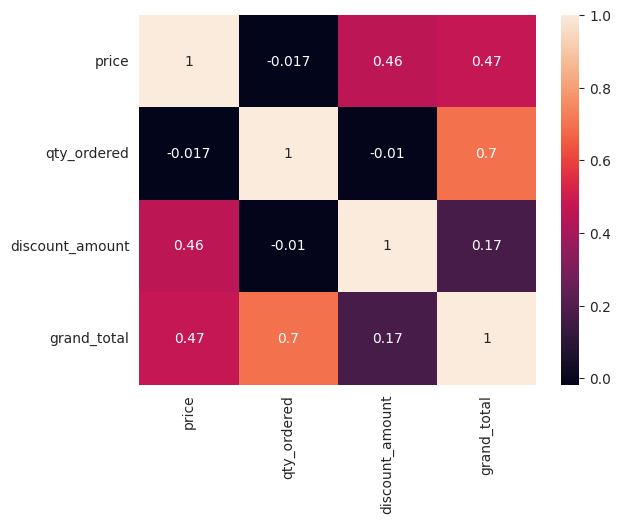

In [ ]:
correlation = df[['price', 'qty_ordered', 'discount_amount', 'grand_total']].corr()
sns.heatmap(correlation, annot = True)

There are no strong correlation between numerical features on the dataset

## **Show Canceled Order Proportion in the Dataset**

In [ ]:
check = df.groupby('is_canceled').agg({'is_canceled':'count'}).rename(columns={'is_canceled':'count'}).sort_values(by='count', ascending=False).reset_index()
check['proportion'] = check['count'] / check['count'].sum()*100
check

,is_canceled,count,proportion
0,0,377041,65.654902
1,1,197236,34.345098


Around 34.42% of order are canceled.

## **Show Cancelled Order Proportion Overtime**

In [ ]:
dfx = pd.crosstab(df['transaction_date'], df['is_canceled'], normalize='index').reset_index()
dfx.columns.name = None
dfx = dfx[['transaction_date', '0', '1']]

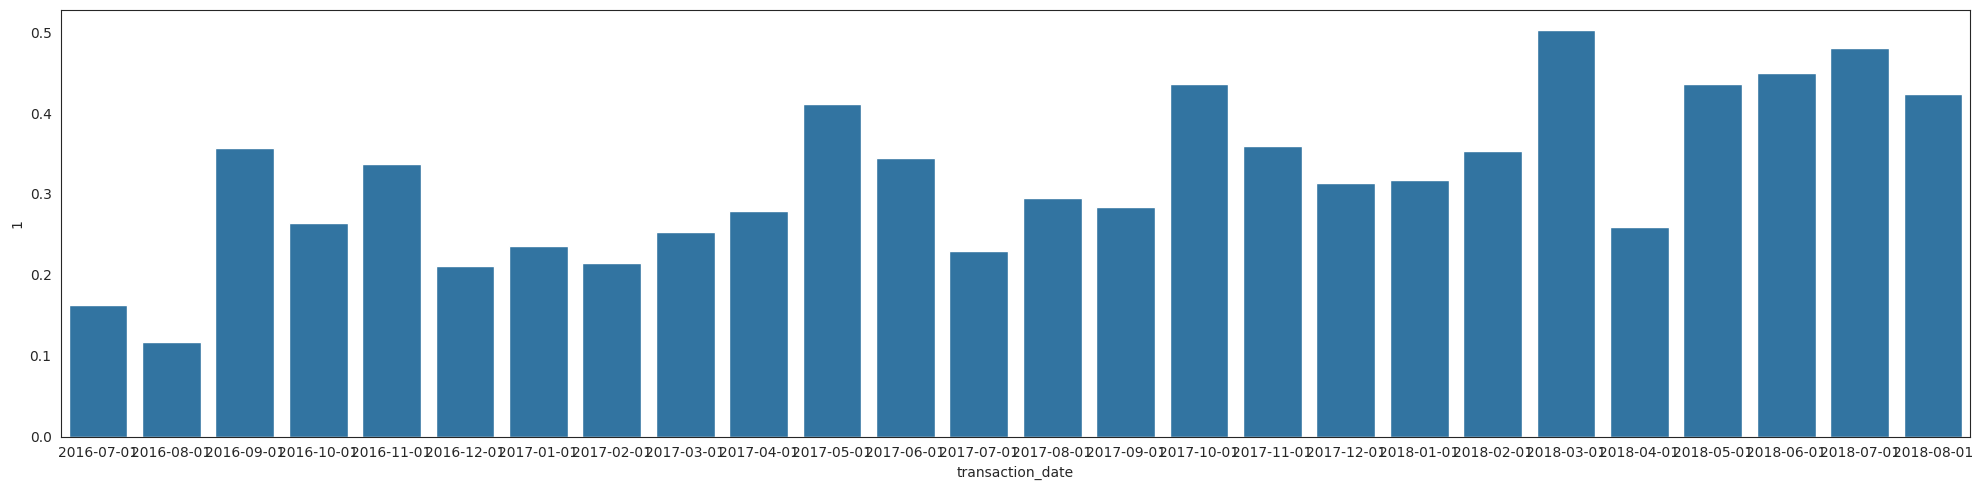

In [ ]:
fig = plt.subplots(figsize = (20, 5))
sns.barplot(dfx, x='transaction_date', y = '1')
plt.tight_layout()

Insights:
* Proportion wise, canceled orders are rising consistently

## **Show Cancelled Order Price Distribution**

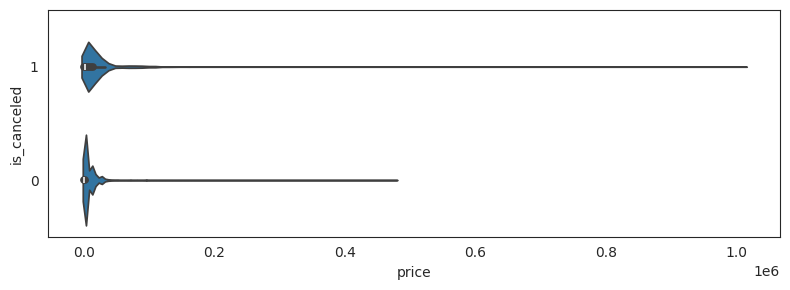

In [ ]:
fig = plt.subplots(figsize = (8, 3))
sns.violinplot(df, x = 'price', y = 'is_canceled')
plt.tight_layout()

In [ ]:
df.groupby('is_canceled').agg({'price':['mean','min', 'median', 'max']}).style.format('{:,.2f}')

Insights:
* Looking at the violin plot, it is indicative that high priced product are more likely to be cancelled
* Mean and median of cancelled orders are higher than non-cancelled order, indicating customer are more likely to cancel higher priced product

## **Show Cancelled Order by Category**

In [ ]:
check = df.groupby(['category_name', 'is_canceled']).agg({'category_name':'count'}).\
rename(columns = {'category_name':'count'}).\
sort_values(by = 'count', ascending = False).reset_index()
check['total_category'] = check.groupby('category_name')['count'].transform('sum')
check = check[check['is_canceled'] == '1'].reset_index(drop = True)
check['pct_canceled_cat'] = (check['count'] / check['total_category'] * 100).round(2)

Text(0.5, 1.0, 'Percent Canceled Orders by Category')

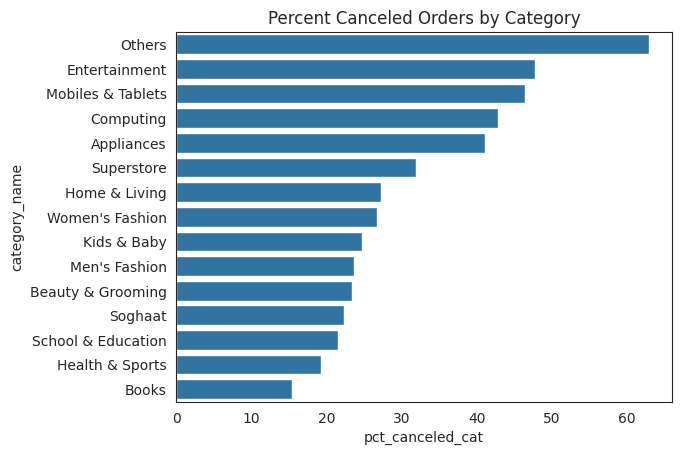

In [ ]:
sns.barplot(check.sort_values(by = 'pct_canceled_cat', ascending = False), y = 'category_name', x = 'pct_canceled_cat')
plt.title('Percent Canceled Orders by Category')

Text(0.5, 1.0, 'Total Canceled Orders by Category')

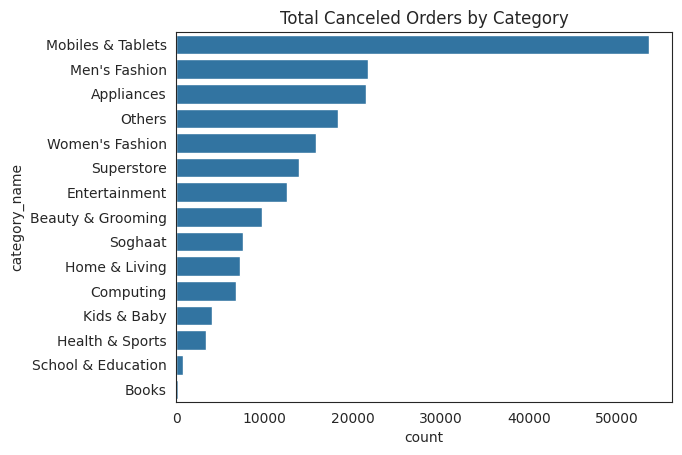

In [ ]:
sns.barplot(check.sort_values(by = 'count', ascending = False), y = 'category_name', x = 'count')
plt.title('Total Canceled Orders by Category')

In [ ]:
only_list = {'Mobiles & Tablets', "Men's Fashion", 'Appliances', 'Others'}
df['cat_class'] = df['category_name'].apply(lambda x: x if x in only_list else 'other')

In [ ]:
td_df = df.groupby(['transaction_date','cat_class', 'is_canceled']).\
agg({'cat_class':'count'}).rename(columns = {'cat_class':'count'}).reset_index()
td_df = td_df[td_df['is_canceled'] == '1'].reset_index(drop = True)
td_df['proportion'] = td_df['count'] / td_df.groupby('transaction_date')['count'].transform('sum')
td_df['proportion_global'] = td_df['count'] / td_df['transaction_date'].map(df['transaction_date'].value_counts())

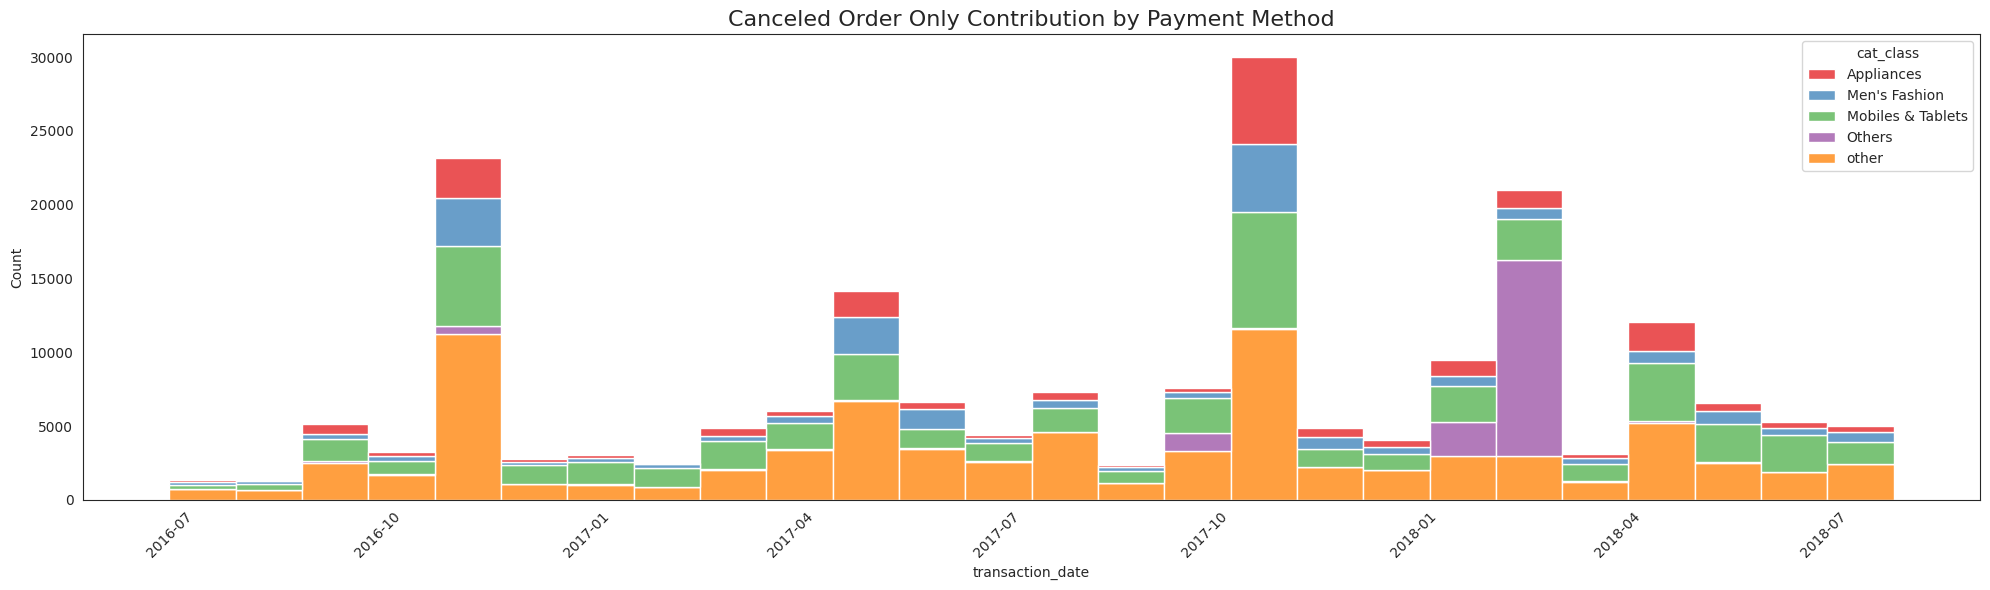

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot( data=td_df, x='transaction_date', hue='cat_class', weights='count',\
             multiple='stack', bins=len(td_df['transaction_date'].unique()), palette = 'Set1')
plt.title('Canceled Order Only Contribution by Payment Method', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

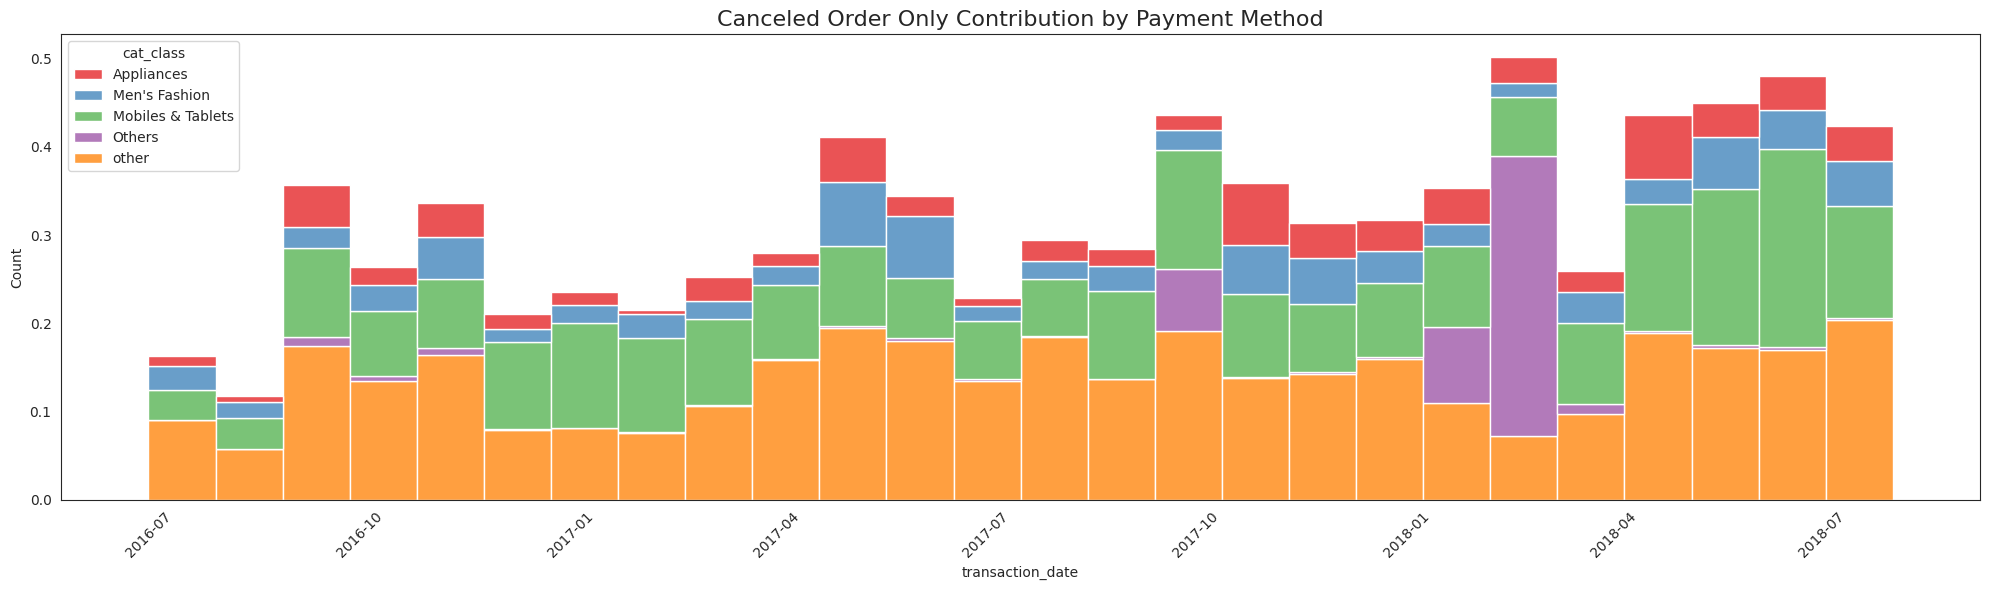

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot( data=td_df, x='transaction_date', hue='cat_class', weights='proportion_global',\
             multiple='stack', bins=len(td_df['transaction_date'].unique()), palette = 'Set1')
plt.title('Canceled Order Only Contribution by Payment Method', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

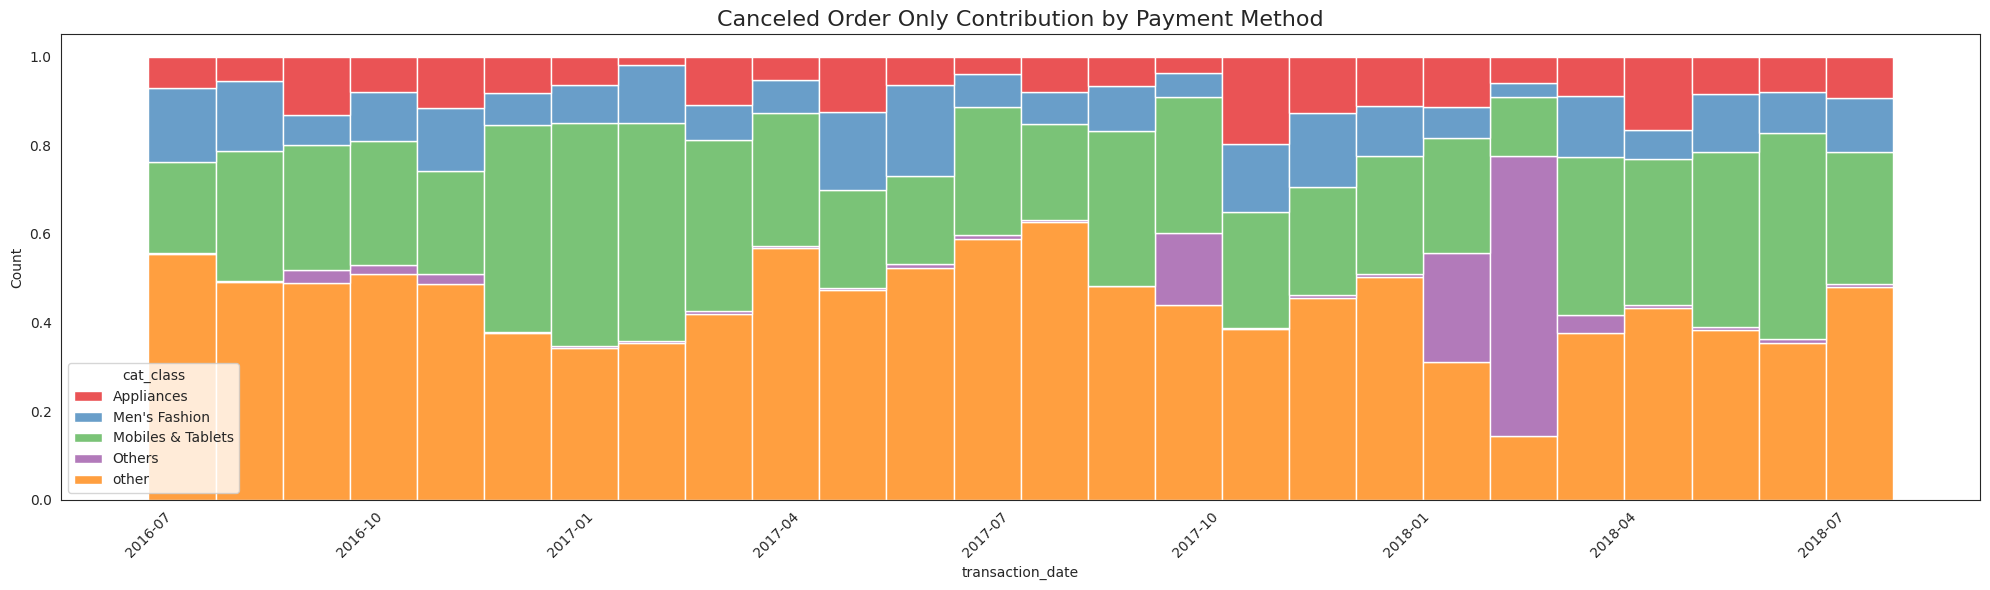

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot( data=td_df, x='transaction_date', hue='cat_class', weights='proportion',\
             multiple='stack', bins=len(td_df['transaction_date'].unique()), palette = 'Set1')
plt.title('Canceled Order Only Contribution by Payment Method', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Show Cancelled Order by Payment Method**

In [ ]:
check = df.groupby(['payment_method', 'is_canceled']).agg({'payment_method':'count'}).\
rename(columns = {'payment_method':'count'}).\
sort_values(by = 'count', ascending = False).reset_index()
check['total_category'] = check.groupby('payment_method')['count'].transform('sum')
check = check[check['is_canceled'] == '1'].reset_index(drop = True)
check['pct_canceled_cat'] = (check['count'] / check['total_category'] * 100).round(2)

Text(0.5, 1.0, 'Percent Canceled Orders by Payment Method')

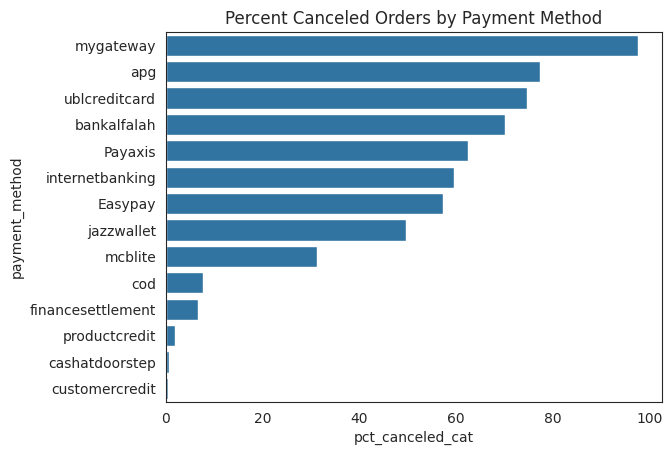

In [ ]:
sns.barplot(check.sort_values(by = 'pct_canceled_cat', ascending = False), y = 'payment_method', x = 'pct_canceled_cat')
plt.title('Percent Canceled Orders by Payment Method')

Text(0.5, 1.0, 'Total Canceled Orders by Payment Method')

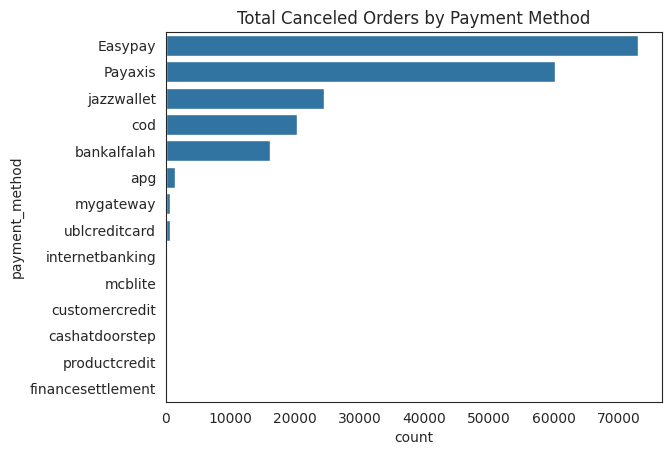

In [ ]:
sns.barplot(check.sort_values(by = 'count', ascending = False), y = 'payment_method', x = 'count')
plt.title('Total Canceled Orders by Payment Method')

Insights:
* Out of all payment method, payment method mygateway has the highest percentage of cancelled order with 97.63% of all orders are cancelled
* Compared to the global total of canceled order, Payxis and Easypay payment method has the highest contribution with over 60% of all cancelled order are through these two payment method

## **EDA by Payment Method and Cancelled Overtime**

In [ ]:
only_list = {'Payaxis', 'Easypay', 'bankalfalah'}
df['pm_class'] = df['payment_method'].apply(lambda x: x if x in only_list else 'other')

In [ ]:
td_df = df.groupby(['transaction_date','pm_class', 'is_canceled']).\
agg({'pm_class':'count'}).rename(columns = {'pm_class':'count'}).reset_index()
td_df = td_df[td_df['is_canceled'] == '1'].reset_index(drop = True)
td_df['proportion'] = td_df['count'] / td_df.groupby('transaction_date')['count'].transform('sum')
td_df['proportion_global'] = td_df['count'] / td_df['transaction_date'].map(df['transaction_date'].value_counts())

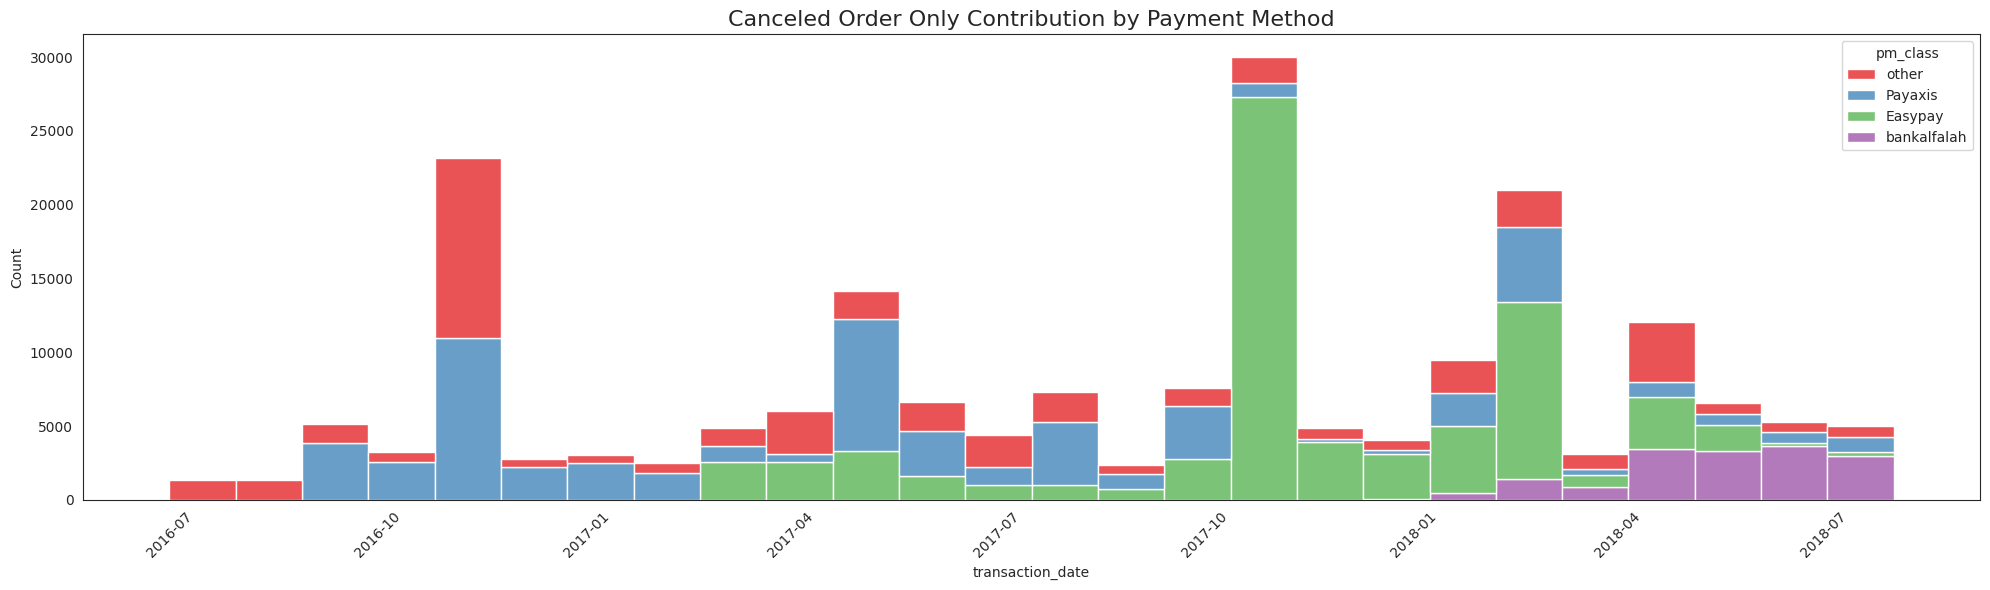

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot( data=td_df, x='transaction_date', hue='pm_class', weights='count',\
             multiple='stack', bins=len(td_df['transaction_date'].unique()), palette = 'Set1')
plt.title('Canceled Order Only Contribution by Payment Method', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:
* There is striking evidence that Easypay dominate for canceled order by count just after 2017-10, with over 25,000 orders are canceled
* Payment method bankalfalah started to takeover as the dominant payment method to inflict high order cancellation after 2018-01

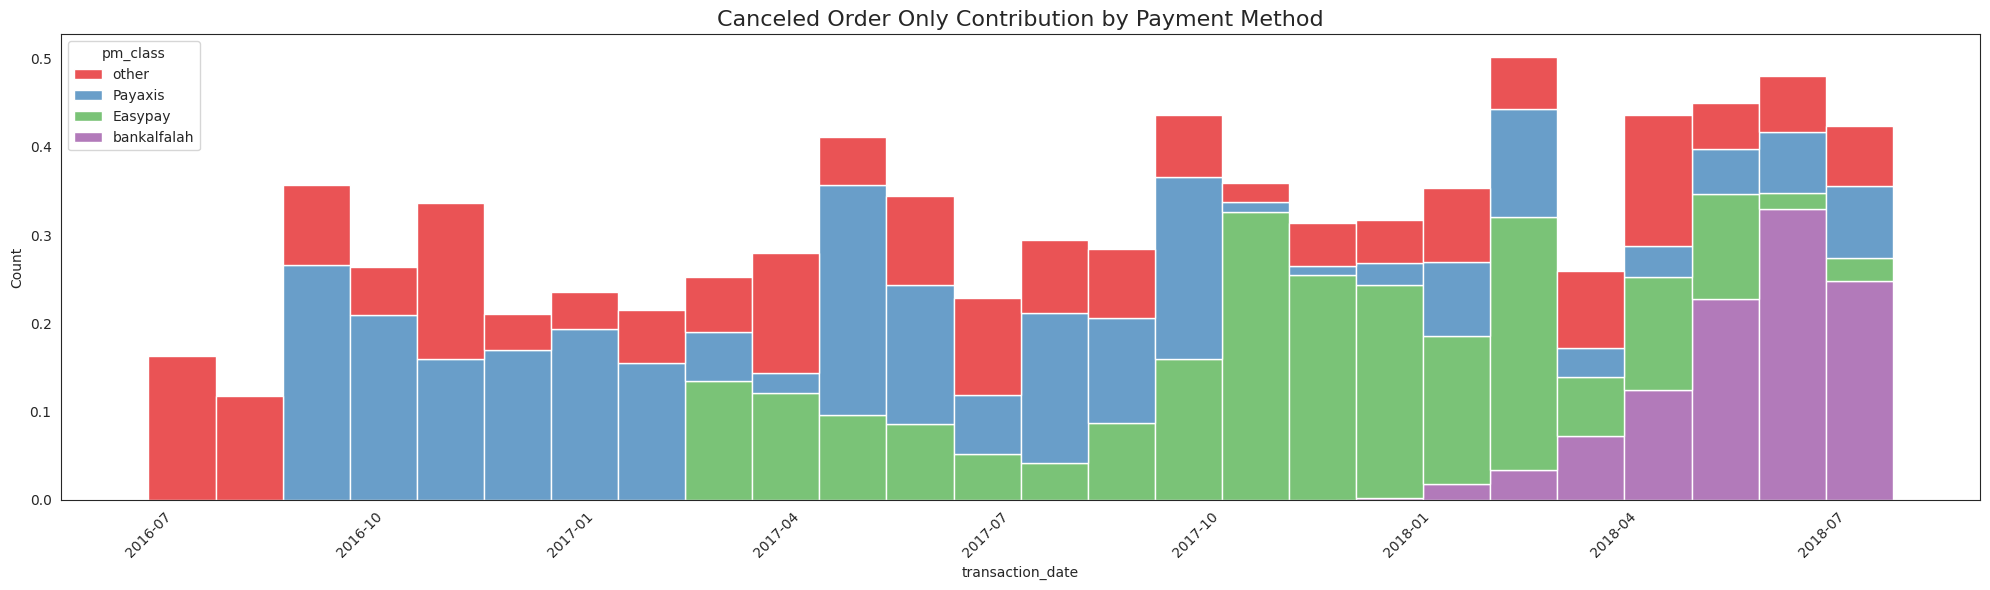

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot( data=td_df, x='transaction_date', hue='pm_class', weights='proportion_global',\
             multiple='stack', bins=len(td_df['transaction_date'].unique()), palette = 'Set1')
plt.title('Canceled Order Only Contribution by Payment Method', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
* By proportion of canceled order, it is shown that Easypay and bankalfalah contribution to canceled order consistently increasing overtime

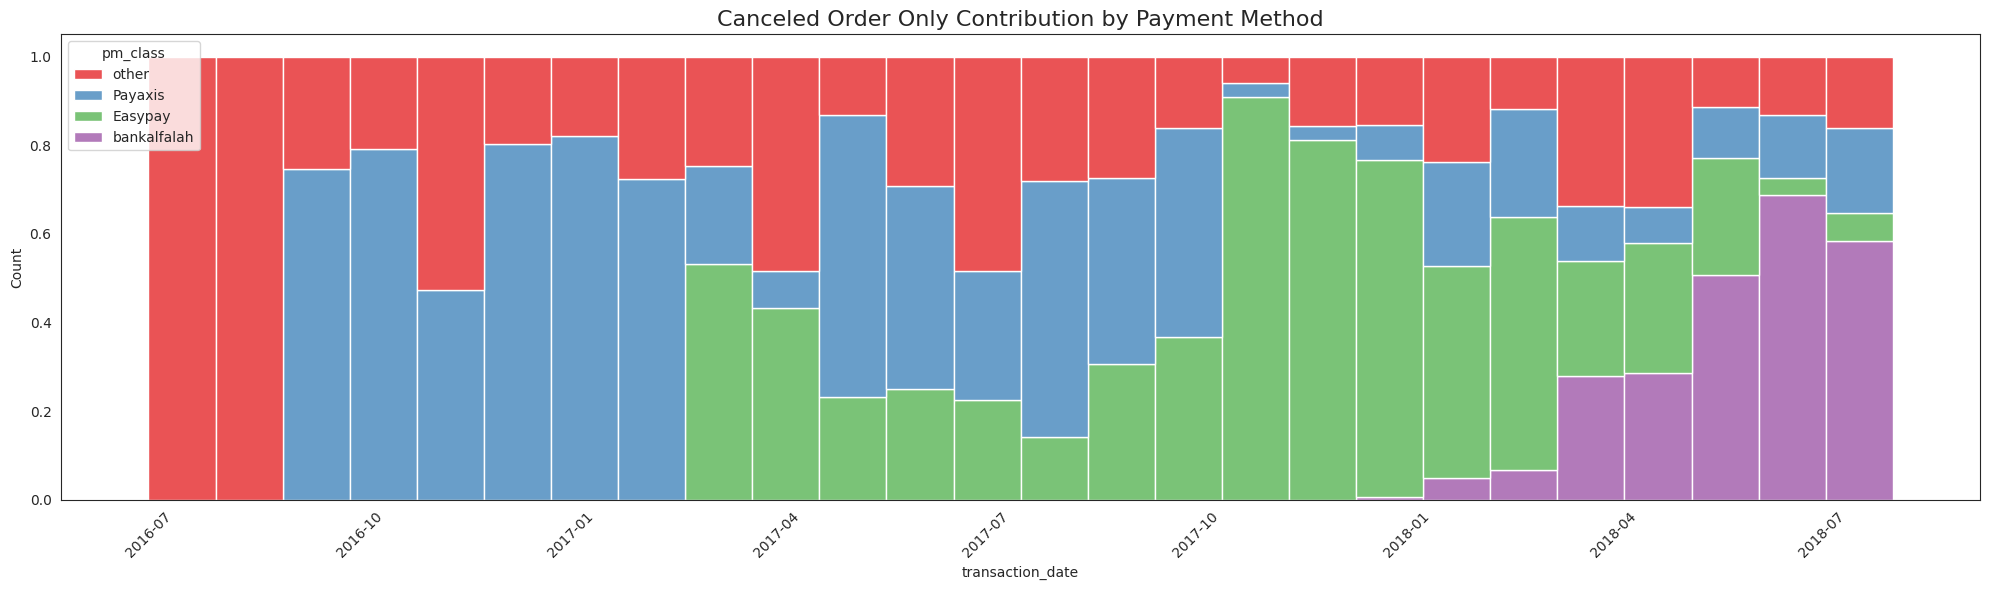

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot( data=td_df, x='transaction_date', hue='pm_class', weights='proportion',\
             multiple='stack', bins=len(td_df['transaction_date'].unique()), palette = 'Set1')
plt.title('Canceled Order Only Contribution by Payment Method', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:
* Easypay has the highest contribution to canceled order in Q4 2017

## **Show Easypay Order Activites in Q4 2017**

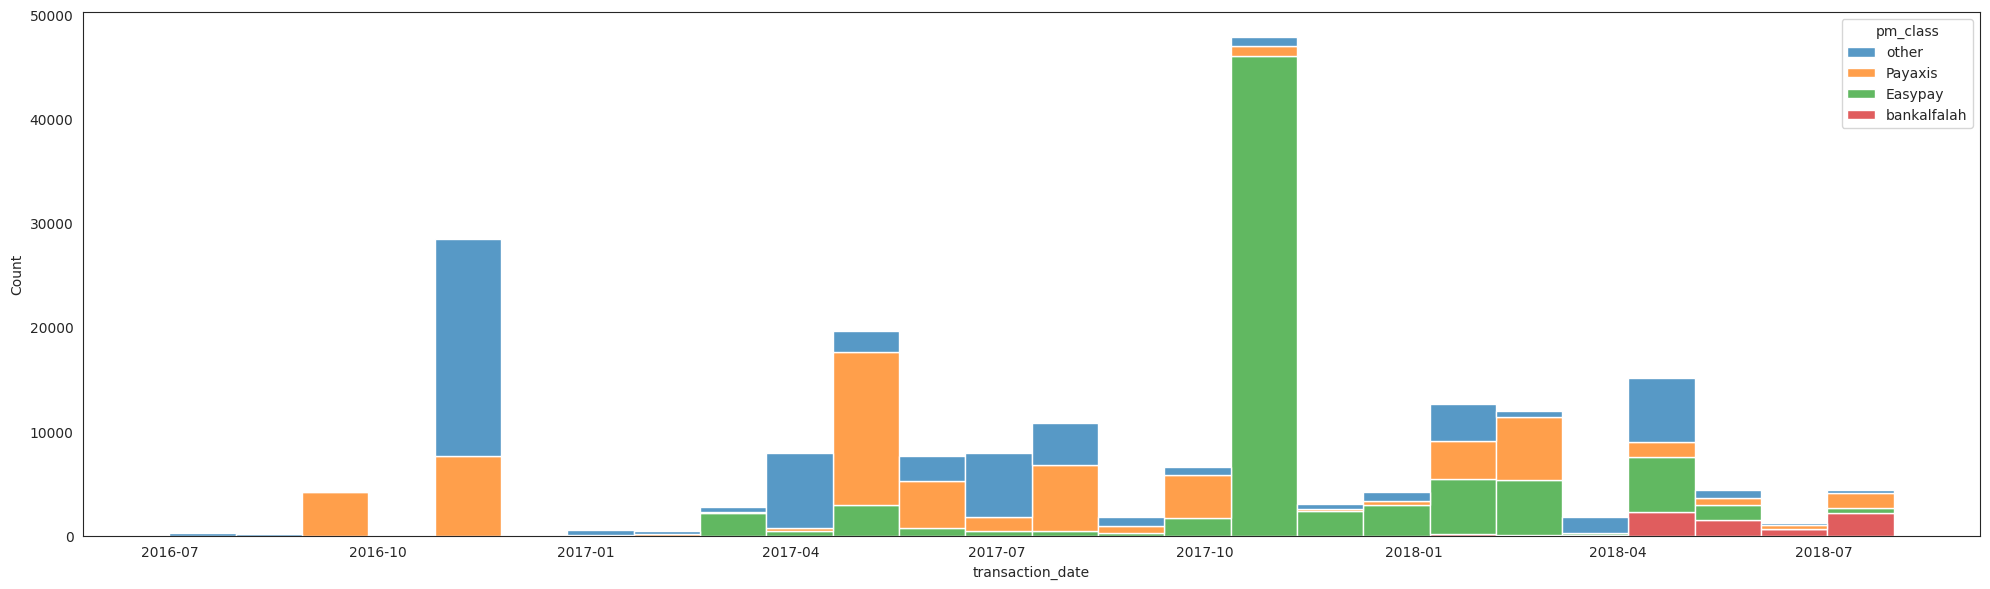

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(df[df['is_discounted'] == '1'], x = 'transaction_date', hue = 'pm_class',\
             multiple = 'stack', bins = len(df['transaction_date'].value_counts()))
plt.tight_layout()

Insights:
* Pairing Easypay high cancelation order dan discount distributed in Q4 2017, it is evident that the high cancelation rate is caused by high order volume by Easypay where discount is distributed

## **Show Payment Method Product Composition**

In [ ]:
check = df.groupby(['pm_class', 'category_name', 'is_canceled']).agg({'category_name':'count'}).\
rename(columns = {'category_name':'cnt'}).reset_index()

value_counts = df.groupby(['pm_class', 'category_name']).size()
check['total'] = check.set_index(['pm_class', 'category_name']).index.map(value_counts)
check = check[check['is_canceled'] == '1'].reset_index(drop = True).sort_values(by = ['pm_class','total'], ascending = [True, False])
check['pct_canceled'] = (check['cnt'] / check['total'] * 100).round(2)
check['pct_cat'] = (check['total'] / check['category_name'].map(df['category_name'].value_counts())*100).round(2)

check

,pm_class,category_name,is_canceled,cnt,total,pct_canceled,pct_cat
9,Easypay,Mobiles & Tablets,1,19415,35015,55.45,30.34
0,Easypay,Appliances,1,9530,18967,50.25,36.25
10,Easypay,Others,1,10808,15369,70.32,52.66
8,Easypay,Men's Fashion,1,8262,12536,65.91,13.65
4,Easypay,Entertainment,1,4927,10309,47.79,39.17
14,Easypay,Women's Fashion,1,4919,8180,60.13,13.75
13,Easypay,Superstore,1,2607,5579,46.73,12.84
1,Easypay,Beauty & Grooming,1,2988,5471,54.62,13.21
6,Easypay,Home & Living,1,2892,5019,57.62,19.01
3,Easypay,Computing,1,2267,3970,57.10,24.97


Insights:
* Across all product category, payment method Easypay, payaxis, and bankalfalah at minimum causes 40% of orders to be canceled
* 'other' payment method serviced more product category (shown by pct_cat), yet its cancelation rate are relatively lower than Easypay, payaxis and bankalfalah

# **Exploratory Data Analysis - Customer Focus**

## **Group Numerical Features**

In [ ]:
df_num = df.groupby('customer_id').agg({'grand_total':'sum','qty_ordered':'sum','price':'mean','discount_amount':'sum', 'is_discounted':'sum'}).reset_index()
df_status = df.groupby(['customer_id','status']).size().unstack(fill_value = 0).reset_index()
df_cat = df.groupby(['customer_id','category_name']).size().unstack(fill_value = 0).reset_index()
df_paym = df.groupby(['customer_id','payment_method']).size().unstack(fill_value = 0).reset_index()
df_td = df.groupby(['customer_id','transaction_date']).size().unstack(fill_value = 0).reset_index()

## **Group into One & Add Other Features**

In [ ]:
df_cust = pd.merge(df_num, df_status, how='inner', on='customer_id')
df_cust = pd.merge(df_cust, df_cat, how='inner', on='customer_id')
df_cust = pd.merge(df_cust, df_paym, how='inner', on='customer_id')
df_cust = pd.merge(df_cust, df_td, how='inner', on='customer_id')

In [ ]:
df_cust['is_canceled'] = df_cust['canceled'].apply(lambda x: '1' if x > 0 else '0')

In [ ]:
df_cust = df_cust.rename(columns = {'cod_x':'cod_status', 'cod_y':'cod_payment'})

In [ ]:
df_cust['total_order'] = df_cust[['canceled', 'closed', 'cod_status', 'complete', 'exchange',\
                             'fraud', 'holded', 'order_refunded', 'paid', 'payment_review',\
                             'pending', 'pending_paypal', 'processing', 'received', 'refund']].sum(axis = 1)

In [ ]:
df_cust['canceled_proportion'] = df_cust['canceled'] / df_cust['total_order']*100

## **EDA by Pairplot of Statuses**

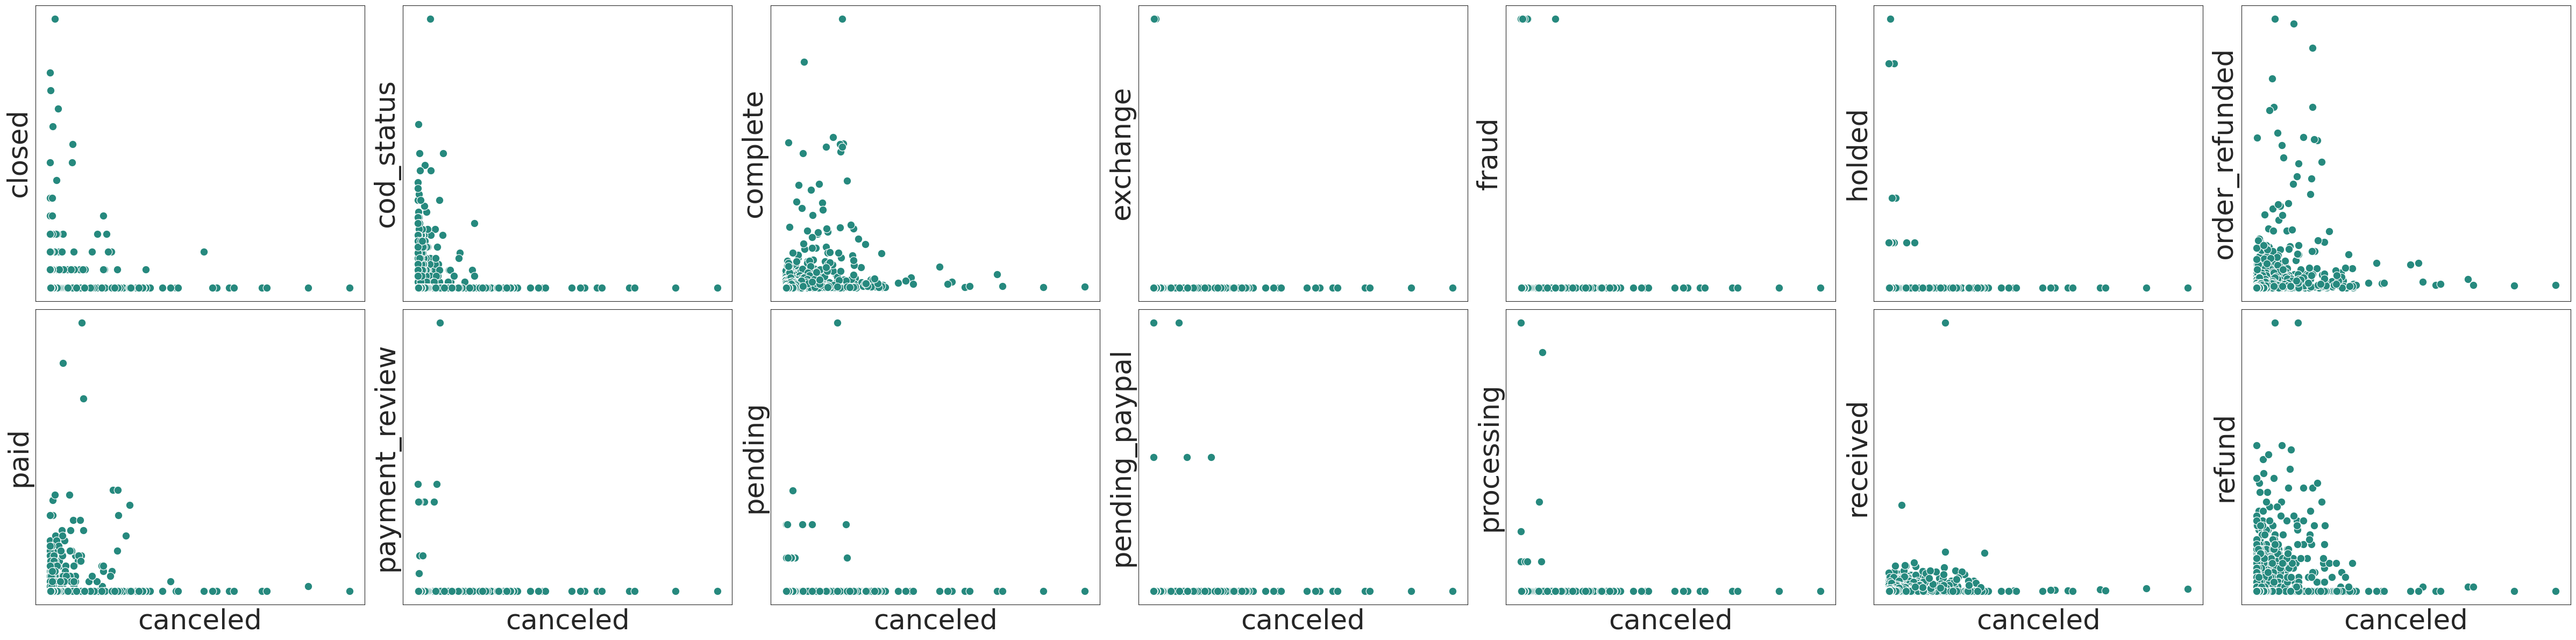

In [ ]:
custval = ['closed', 'cod_status', 'complete', 'exchange', 'fraud', 'holded',\
           'order_refunded', 'paid', 'payment_review', 'pending',\
           'pending_paypal', 'processing', 'received', 'refund']

fig, ax = plt.subplots(2, 7, figsize = (48,12))
ax = ax.flatten()
for i, val in enumerate(custval):
  sns.scatterplot(df_cust, x = 'canceled', y = val, ax = ax[i], color = '#26897E', s=110)
  sns.set_style("white")
  ax[i].set_ylabel(val, fontsize=37)
  ax[i].set_xlabel('canceled', fontsize=37)
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  if i < 7:
        ax[i].set_xlabel('')

plt.tight_layout()

Insights:
* There seems to be no strong correlation between other order statuses occurences with tha increase of canceled order

# **Summary Insights**

* Higher priced product are prone to be canceled by customer
* Easypay offers massive discount campaign in Q4 2017, increasing number of overall orders but also increasing cancellation rate
* Bankalfalah started to dominate as the preferred payment method after the start of 2018, with it also dominate as the highest contributor of canceled order
* There's anomaly increase of 'Other' product category where the number of canceled order spiked significantly in Q1 2018
* Payment method with high cancelation rate is correlated with product category with high cancelation rate
* There's no strong correlation between customer behavior to each statuses to increase cancellation rate

